In [1]:
%matplotlib inline
import pandas as pd
from datasets import load_dataset
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from itertools import chain
import seaborn as sns
import os

sns.set_theme()
plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
categories = [
  'Legality_Constitutionality_and_jurisprudence',
  'Quality_of_life',
  'Cultural_identity',
  'Fairness_and_equality',
  'Health_and_safety',
  'Policy_prescription_and_evaluation',
  'Political',
  'Capacity_and_resources',
  'Economic',
  'Public_opinion',
  'Morality',
  'Crime_and_punishment',
  'External_regulation_and_reputation',
  'Security_and_defense',
  ]
categories.sort()

In [3]:
def get_features_from_files(features_filenames):
    return load_dataset("text", data_files=features_filenames, sample_by="document", split="train")

def get_dataset(data_dir, prefix='train'):
    def attach_labels(record, idx):
        lbls = labels.iloc[idx]["labels"].split(",")
        return {"labels": [int(cat_name in lbls) for cat_name in categories]}

    features_dir_path = f"{data_dir}/{prefix}-articles-subtask-2"
    labels_path = f"{data_dir}/{prefix}-labels-subtask-2.txt"
    labels = pd.read_csv(labels_path, sep="\t", header=None, names=["ids", "labels"], index_col="ids")
    features_filenames = [os.path.join(features_dir_path, f"article{id}.txt") for id in labels.index]
    features = get_features_from_files(features_filenames)

    return features.map(attach_labels, with_indices=True)

def get_split_dataset(data_dir, split=0.2, seed=42):
    split_dataset = get_dataset(data_dir).train_test_split(split, seed=seed)
    return split_dataset["train"], split_dataset["test"]

# Analysis of Articles

In [4]:
langs = ['en', 'ge', 'ru']
datasets = {l:get_dataset(f"../data/{l}") for l in langs}
dfs = {l:pd.DataFrame(datasets[l]) for (l,dataset) in zip(langs,datasets)}
datasets_dev = {l:get_dataset(f'../data/{l}', prefix='dev') for l in langs}
dfs_dev = {l:pd.DataFrame(datasets_dev[l]) for (l,dataset) in zip(langs,datasets)}

Resolving data files:   0%|          | 0/433 [00:00<?, ?it/s]

Using custom data configuration default-89d14f648c9b2d22
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-89d14f648c9b2d22/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)
Parameter 'function'=<function get_dataset.<locals>.attach_labels at 0x7f78227bfca0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/433 [00:00<?, ?ex/s]

Resolving data files:   0%|          | 0/132 [00:00<?, ?it/s]

Using custom data configuration default-9cd3e09132dee3ea
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-9cd3e09132dee3ea/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/132 [00:00<?, ?ex/s]

Resolving data files:   0%|          | 0/143 [00:00<?, ?it/s]

Using custom data configuration default-04418745a3685caf
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-04418745a3685caf/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/143 [00:00<?, ?ex/s]

Resolving data files:   0%|          | 0/83 [00:00<?, ?it/s]

Using custom data configuration default-16b3798cedb69062
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-16b3798cedb69062/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/83 [00:00<?, ?ex/s]

Resolving data files:   0%|          | 0/45 [00:00<?, ?it/s]

Using custom data configuration default-12888632656eb392
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-12888632656eb392/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/45 [00:00<?, ?ex/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Using custom data configuration default-2e7eda06a4c9eb07
Reusing dataset text (/home/alex/.cache/huggingface/datasets/text/default-2e7eda06a4c9eb07/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)


  0%|          | 0/48 [00:00<?, ?ex/s]

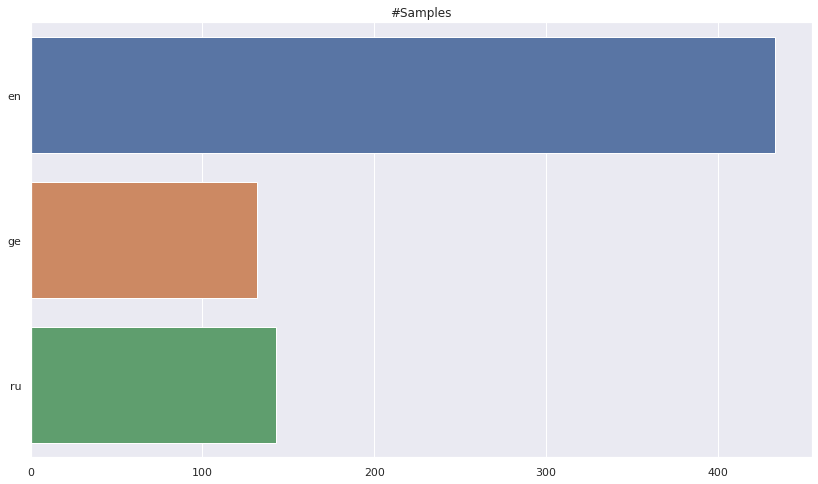

In [5]:
sns.barplot(y=langs, x=[len(d) for d in datasets.values()]).set(title="#Samples")
plt.show()

In [6]:
datasets["en"][:2]

{'text': ['Chelsea Handler Admits She’s ‘Very Sexually Attracted to Robert Mueller’\n\nFar-left comedienne Chelsea Handler has admitted she is “very sexually attracted” to FBI Special Counsel Robert Mueller, just hours after he concluded his investigations into supposed collusion between Russia and Donald Trump’s presidential campaign.\nOn Friday evening, the Justice Department announced that Mueller had concluded his investigations into the matter and that he would not be recommending any more indictments against Trump or anyone else involved in his campaign.\nYet despite the weight of disappointment felt by the majority on the Hollywood left, Chelsea Handler admitted that her obsession with the 74-year-old prosecutor may have been because she found him sexually attractive.\n“If I’m being completely honest, I am very sexually attracted to Robert Mueller,” she wrote on Twitter.\n“I know it’s not meant to be, but that doesn’t mean I won’t hang a poster of him above my bed.”\nIf I’m bein

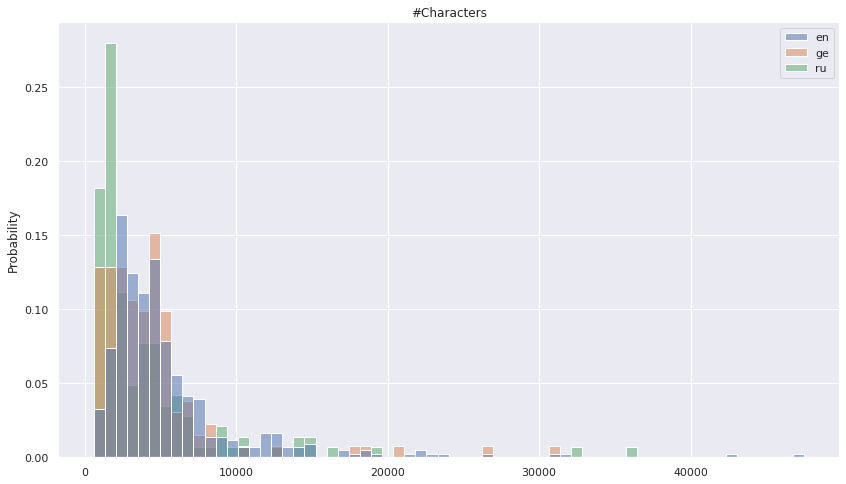

In [7]:
dfs["str_len"] = pd.DataFrame({l: dfs[l].text.str.len() for l in langs})
sns.histplot(dfs["str_len"], stat="probability", common_norm=False).set(title="#Characters")
plt.show()

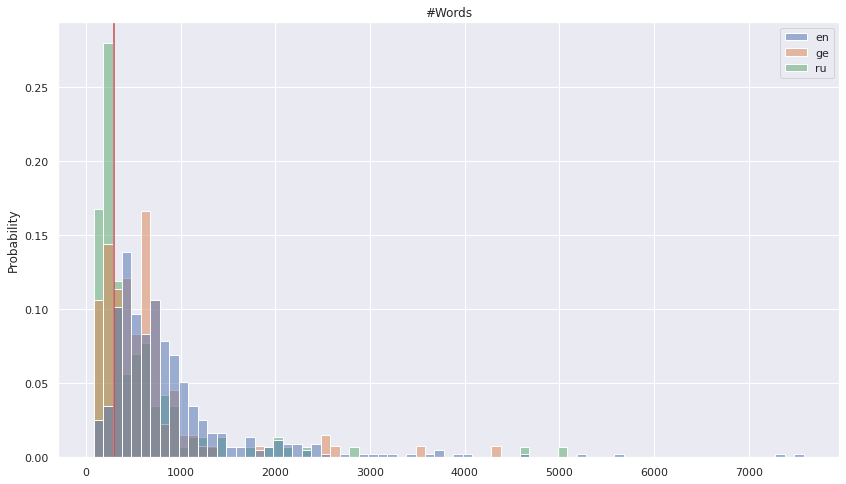

In [8]:
dfs["n_words"] = pd.DataFrame({l: dfs[l].text.str.split().apply(len) for l in langs})
sns.histplot(dfs["n_words"], stat="probability", common_norm=False, binwidth=100).set(title="#Words")
plt.axvline(300, c='r')
plt.show()

# Analysis of Labels

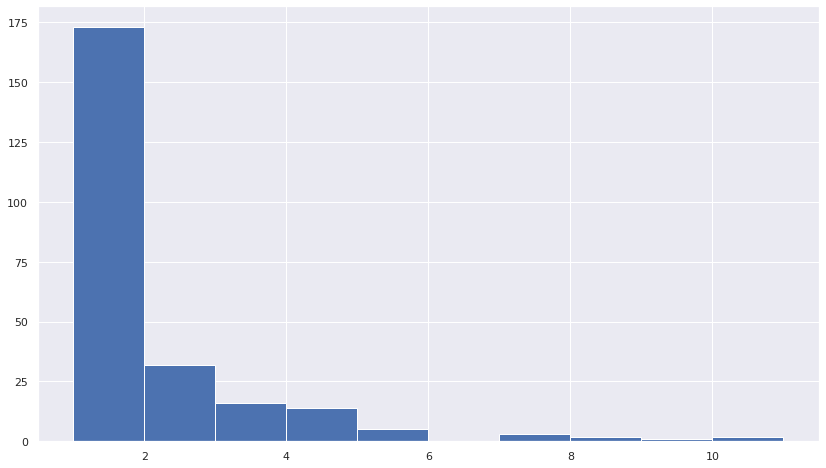

In [9]:
plt.hist(np.unique(dfs['en']['labels'], return_counts=True)[1])
plt.show()

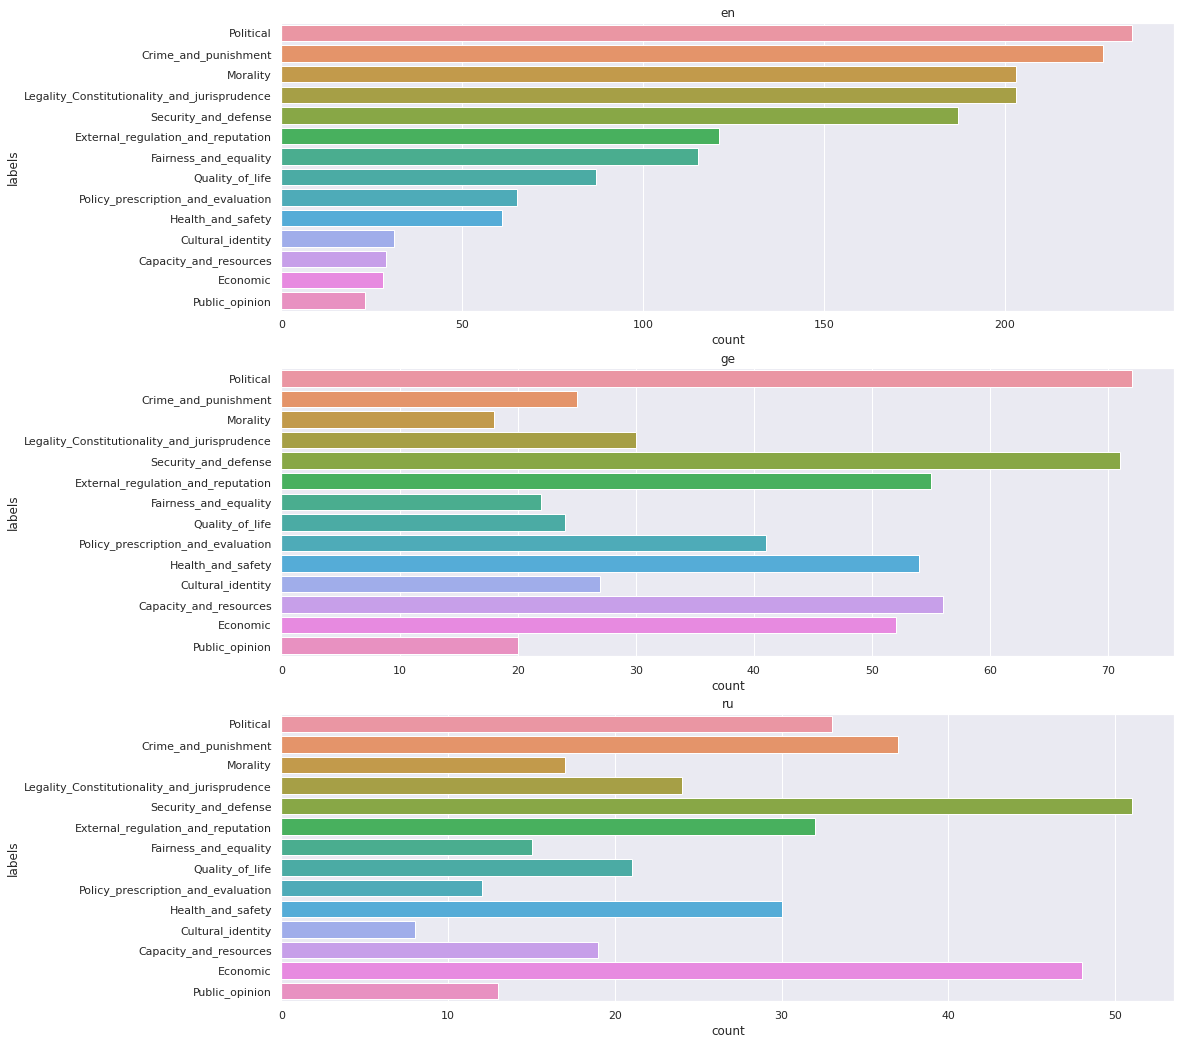

In [10]:
fig, axs = plt.subplots(len(langs), 1, figsize=(16, 18))
order = None
for i, lang in enumerate(langs):
    one_hot_labels = dfs[lang]['labels'].apply(pd.Series)
    one_hot_labels.columns = categories
    label_counts = one_hot_labels.sum(axis=0)
    label_array = pd.DataFrame({"count": label_counts, "labels": categories})
    if order is None:
        order = np.argsort(label_counts)[::-1]
    sns.barplot(x="count", y="labels", data=label_array.iloc[order], ax=axs[i]).set(title=lang)

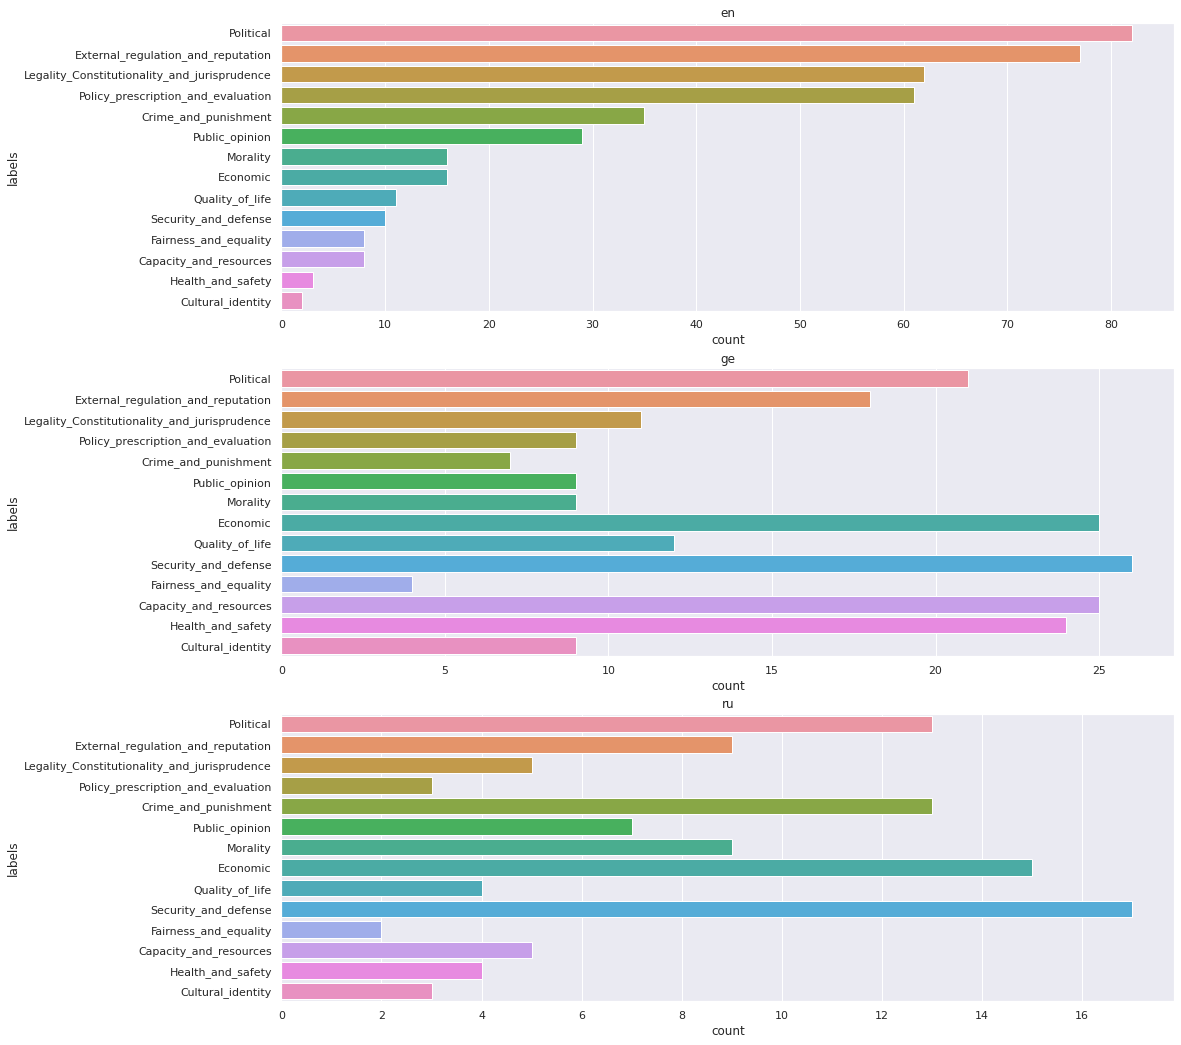

In [11]:
fig, axs = plt.subplots(len(langs), 1, figsize=(16, 18))
order = None
for i, lang in enumerate(langs):
    one_hot_labels = dfs_dev[lang]['labels'].apply(pd.Series)
    one_hot_labels.columns = categories
    label_counts = one_hot_labels.sum(axis=0)
    label_array = pd.DataFrame({"count": label_counts, "labels": categories})
    if order is None:
        order = np.argsort(label_counts)[::-1]
    sns.barplot(x="count", y="labels", data=label_array.iloc[order], ax=axs[i]).set(title=lang)

In [12]:
one_hot_labels = dfs['en']['labels'].apply(pd.Series)
one_hot_labels.columns = categories
one_hot_labels.head(3)

,Capacity_and_resources,Crime_and_punishment,Cultural_identity,Economic,External_regulation_and_reputation,Fairness_and_equality,Health_and_safety,Legality_Constitutionality_and_jurisprudence,Morality,Policy_prescription_and_evaluation,Political,Public_opinion,Quality_of_life,Security_and_defense
0,0,0,0,0,1,1,0,1,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,1,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,1,1,1,0,0


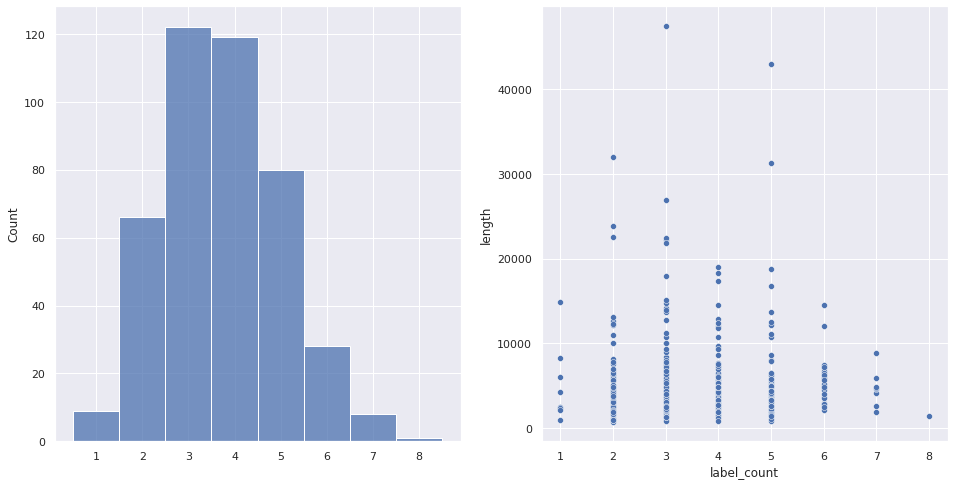

In [13]:
dfs['en']['label_counts'] = one_hot_labels.sum(axis=1)
tmp_df = pd.DataFrame({'label_count': dfs['en']['label_counts'], 'length': dfs['en']['text'].str.len()})
fig, axs = plt.subplots(1, 2, figsize=[16, 8])
sns.histplot(one_hot_labels.sum(axis=1), discrete=True, ax=axs[0])
sns.scatterplot(x='label_count', y='length', data=tmp_df, ax=axs[1])
plt.show()

In [14]:
coocurrence_matrix = one_hot_labels.T.dot(one_hot_labels)
np.fill_diagonal(coocurrence_matrix.values, 0)
order = np.argsort(coocurrence_matrix.sum())

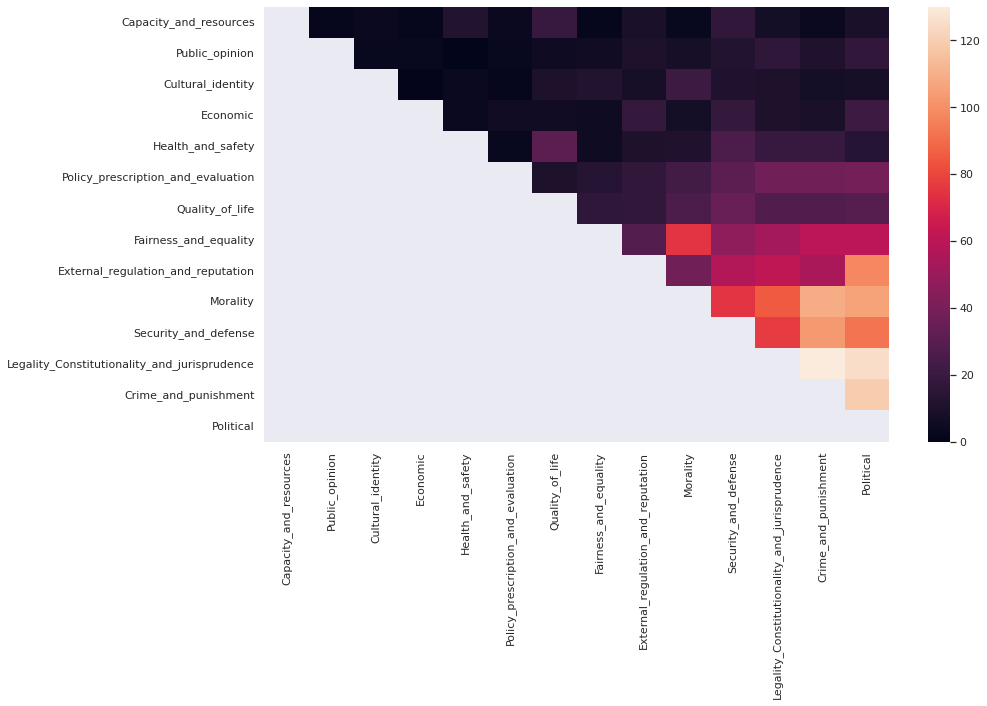

In [15]:
sns.heatmap(coocurrence_matrix.iloc[order,order], mask=np.tri(coocurrence_matrix.shape[0]))
plt.show()

In [16]:
coocurrence_matrix = one_hot_labels.T.dot(one_hot_labels)
for i in range(len(coocurrence_matrix)):
    row = coocurrence_matrix.iloc[i]
    coocurrence_matrix.iloc[i] = row / row[i]
np.fill_diagonal(coocurrence_matrix.values, 0)
order = np.argsort(coocurrence_matrix.sum())

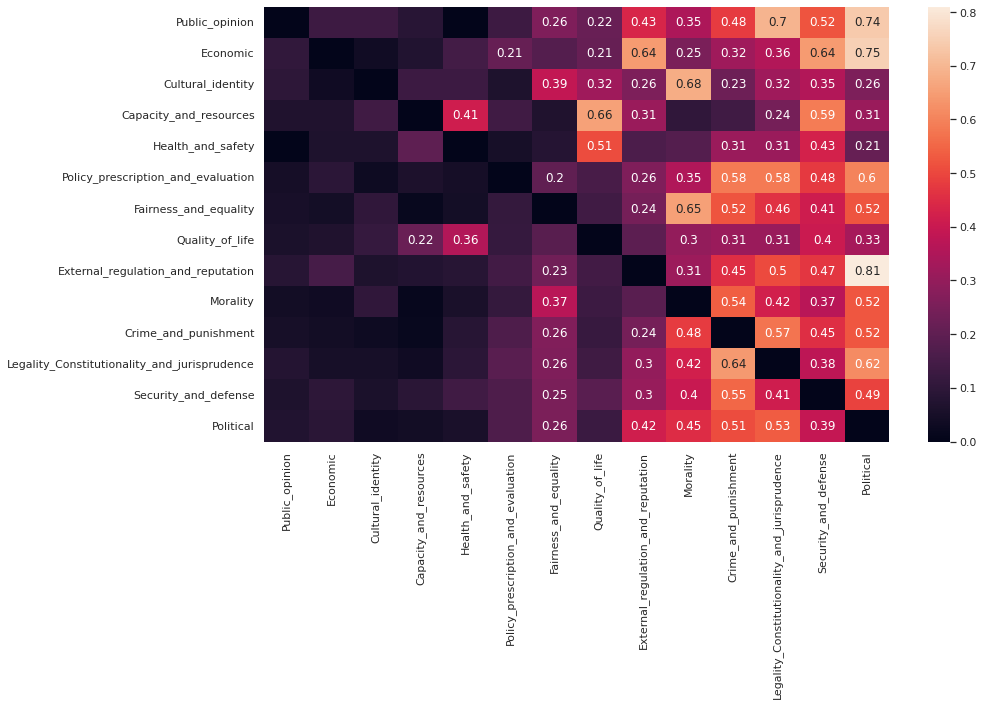

In [17]:
annotations = coocurrence_matrix.iloc[order,order]
annotations = annotations.applymap(lambda x: "" if x < 0.2 else str(round(x, ndigits=2)))
sns.heatmap(coocurrence_matrix.iloc[order,order], annot=annotations, fmt="")
plt.show()

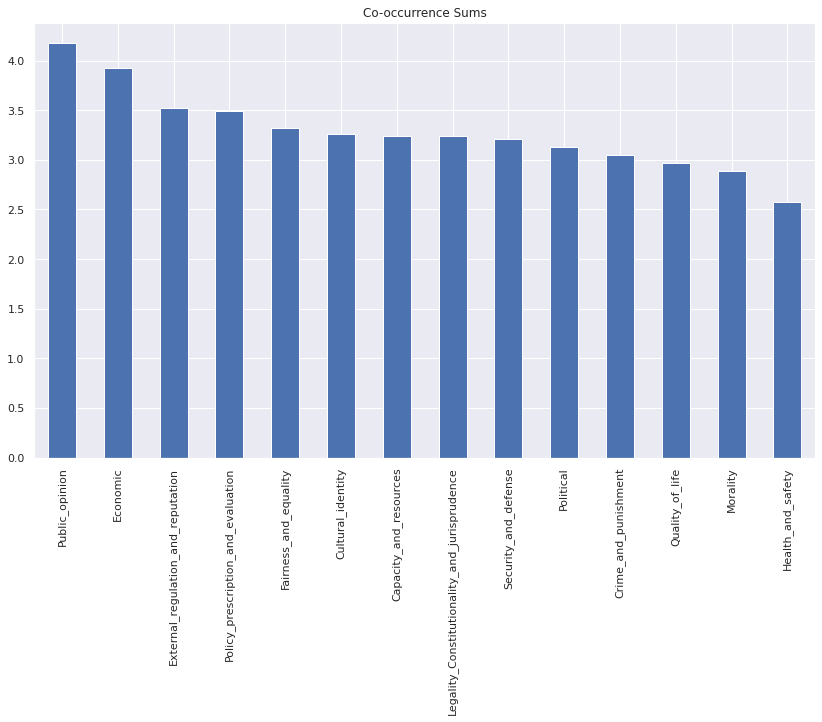

In [18]:
coocurrence_matrix.sum(axis=1).sort_values(ascending=False).plot.bar(title="Co-occurrence Sums")
plt.show()

Health is the most unique class i.e. it doesn't co-occur with as many other labels.

In [19]:
columns = ['Economic', 'Political', 'Crime_and_punishment', 'Legality_Constitutionality_and_jurisprudence', 'Morality', 'Security_and_defense', 'External_regulation_and_reputation', 'Fairness_and_equality', 'Quality_of_life', 'Policy_prescription_and_evaluation', 'Health_and_safety', 'Cultural_identity', 'Capacity_and_resources', 'Public_opinion']
# columns = ['Political', 'Crime_and_punishment', 'Legality_Constitutionality_and_jurisprudence', 'Morality', 'Security_and_defense', 'External_regulation_and_reputation', 'Fairness_and_equality', 'Quality_of_life', 'Policy_prescription_and_evaluation', 'Health_and_safety', 'Cultural_identity', 'Capacity_and_resources', 'Economic', 'Public_opinion']
one_hot_labels = one_hot_labels.iloc[:, np.argsort(one_hot_labels.sum())[::-1]]
one_hot_labels = one_hot_labels.sort_values(columns, ascending=False)

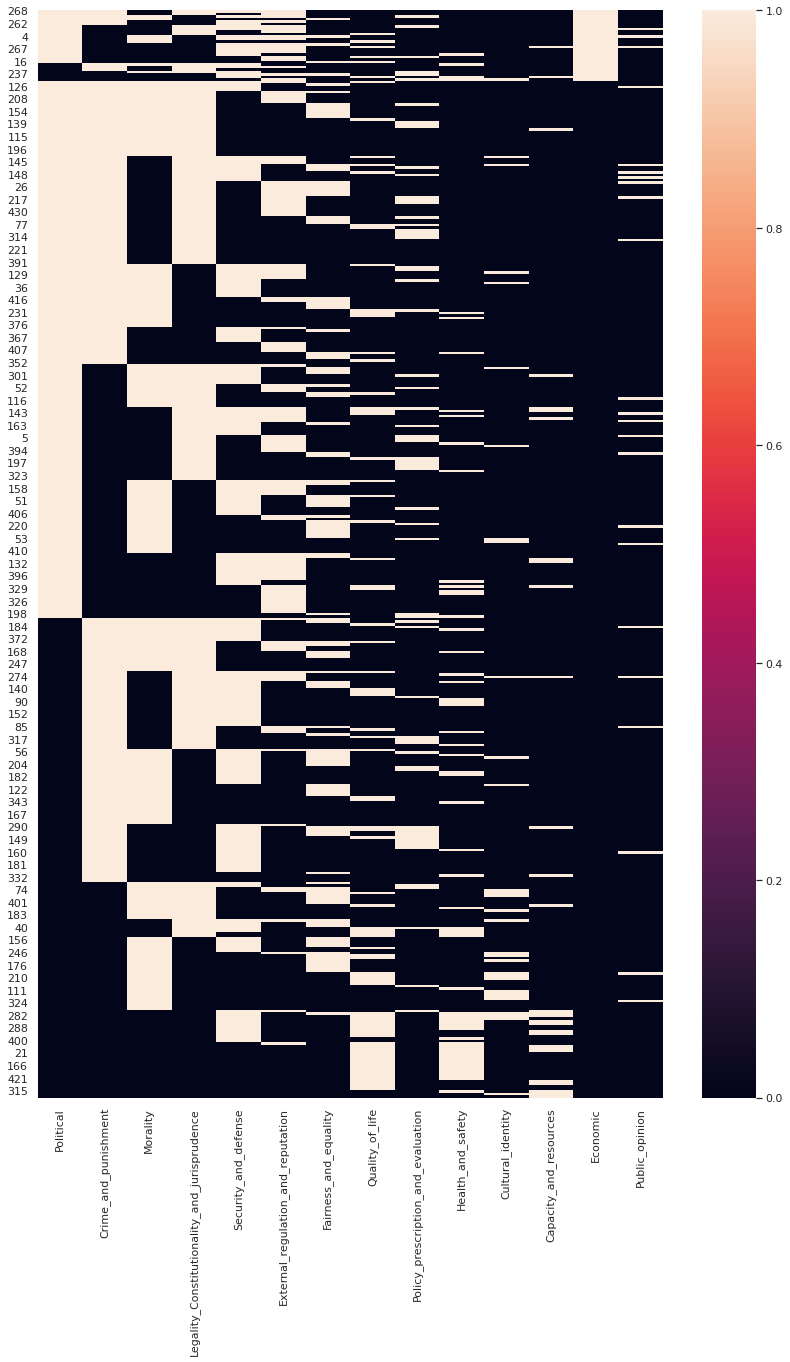

In [20]:
fig, ax = plt.subplots(figsize=[14, 20])
sns.heatmap(one_hot_labels)
plt.show()

# BertTopic

In [21]:
#!pip install umap-learn
#!pip install hdbscan
import hdbscan
import pickle
from sentence_transformers import SentenceTransformer
import umap

In [22]:
#model = SentenceTransformer('all-mpnet-base-v2')
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(datasets['en']['text'])

In [23]:
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=14,
                            metric='cosine').fit_transform(embeddings)

In [24]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [25]:
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['cluster'] = cluster.labels_
for cat, labels in zip(categories, np.array(datasets['en']['labels']).T):
    result[cat] = labels
nonzeros = [list(np.nonzero(l)[0]) for l in datasets['en']['labels']]
result['hover_data'] = [', '.join(np.array(categories)[nz]) for nz in nonzeros]
result.head(3)

,x,y,cluster,Capacity_and_resources,Crime_and_punishment,Cultural_identity,Economic,External_regulation_and_reputation,Fairness_and_equality,Health_and_safety,Legality_Constitutionality_and_jurisprudence,Morality,Policy_prescription_and_evaluation,Political,Public_opinion,Quality_of_life,Security_and_defense,hover_data
0,5.531612,20.885406,2,0,0,0,0,1,1,0,1,1,0,1,0,0,0,"External_regulation_and_reputation, Fairness_a..."
1,6.665601,16.738190,2,0,0,0,1,0,0,0,1,1,1,0,0,0,1,"Economic, Legality_Constitutionality_and_juris..."
2,5.485760,21.050428,2,0,1,0,0,1,0,0,1,0,1,1,1,0,0,"Crime_and_punishment, External_regulation_and_..."


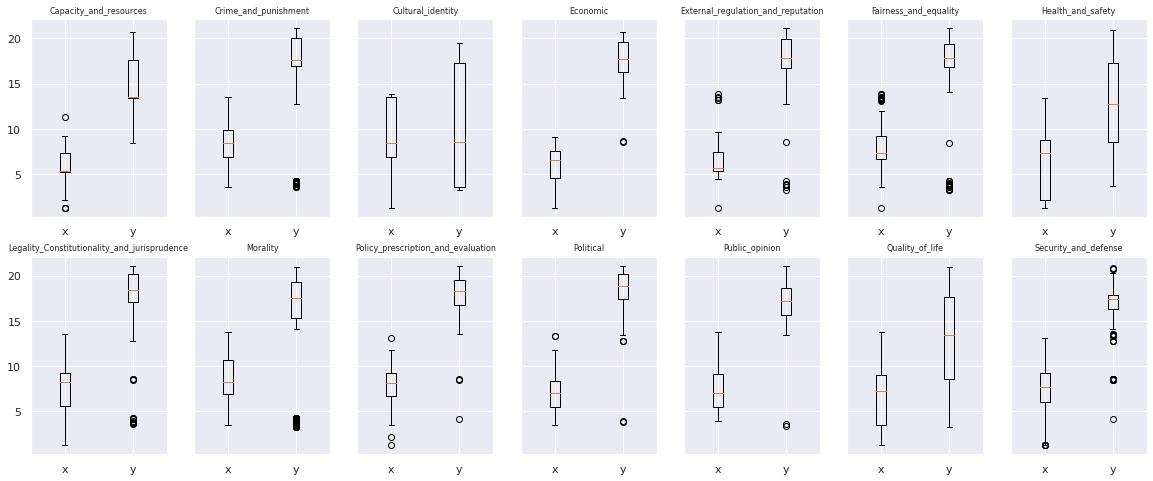

In [26]:
fig, axs = plt.subplots(2, 7, figsize=(20, 8), sharey=True)
for i, cat in enumerate(categories):
    samples = result[result[cat] == 1]
    ax = axs[i // 7][i % 7]
    ax.boxplot(samples[['x', 'y']], labels=['x', 'y'])
    ax.set_title(cat, fontdict={'fontsize': 8})
plt.show()

In [27]:
ground_labels = list()
for cat in categories:
    samples = result[result[cat] == 1]
    mean_pos = (np.mean(samples.x), np.mean(samples.y))
    ground_labels.append((mean_pos, cat))

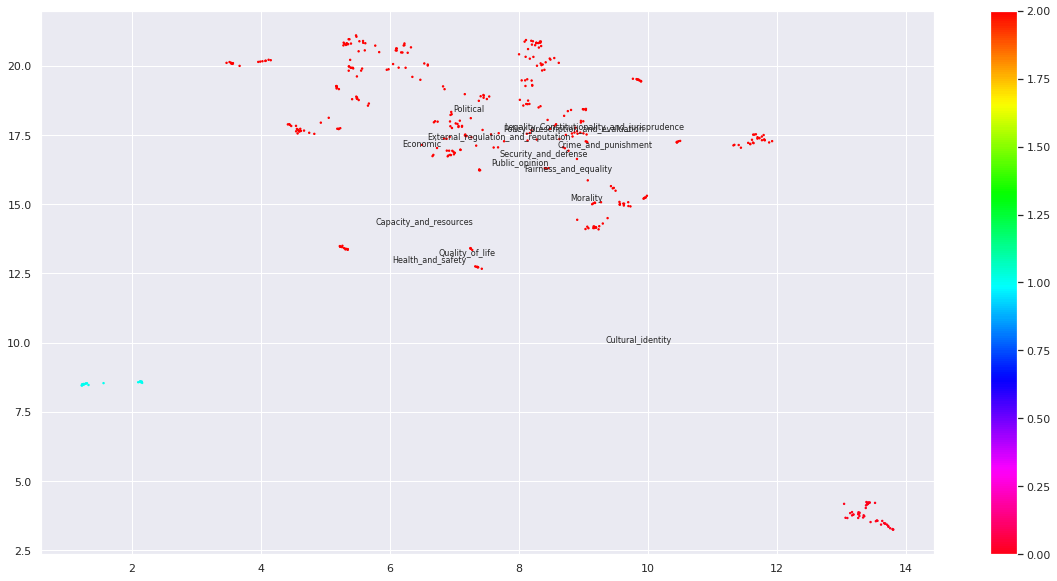

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.cluster == -1, :]
clustered = result.loc[result.cluster != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.5)
plt.scatter(clustered.x, clustered.y, c=clustered.cluster, s=2, cmap='hsv_r')
plt.colorbar()
for mean_pos, ground_label in ground_labels:
    x, y = mean_pos
    plt.text(x, y, ground_label, fontdict={'fontsize': 8})
plt.show()

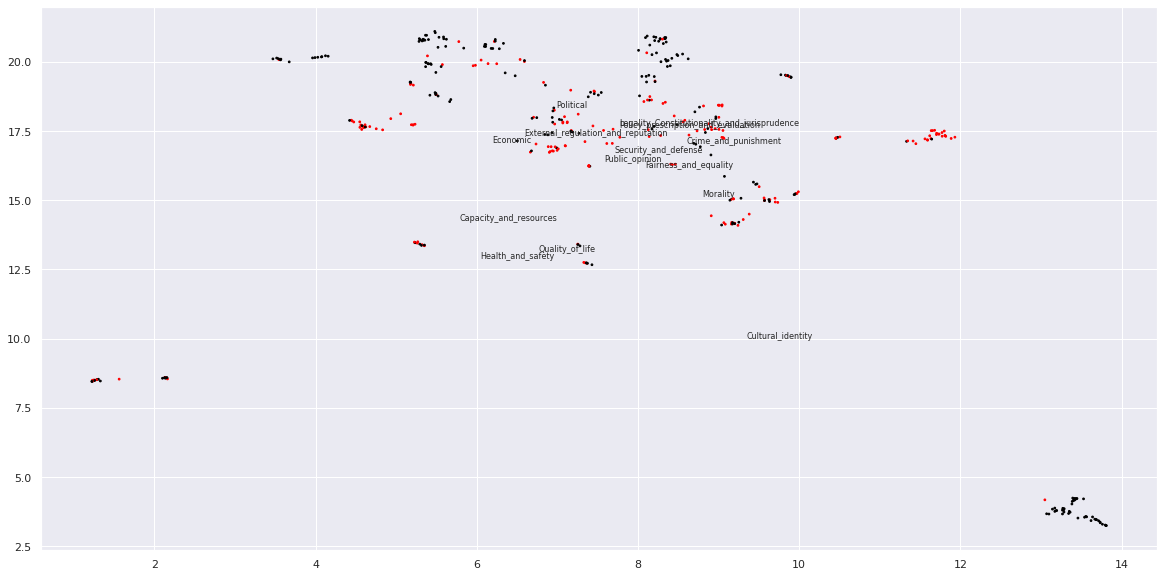

In [29]:
cmap = matplotlib.colors.ListedColormap(['black', 'red'])
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.cluster == -1, :]
clustered = result.loc[result.cluster != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.5)
plt.scatter(clustered.x, clustered.y, c=clustered['Security_and_defense'], s=3, cmap=cmap)
for mean_pos, ground_label in ground_labels:
    x, y = mean_pos
    plt.text(x, y, ground_label, fontdict={'fontsize': 8})
plt.show()